In [87]:
import torch
import torchaudio
import torchaudio.compliance.kaldi as ta_kaldi
from transformers import ASTForAudioClassification, ASTFeatureExtractor

In [88]:
# 1️⃣ 모델 및 Feature Extractor 로드
model_name = "MIT/ast-finetuned-audioset-10-10-0.4593"
feature_extractor = ASTFeatureExtractor.from_pretrained(model_name)
model = ASTForAudioClassification.from_pretrained(model_name)

In [ ]:
audio_path = r"D:\Audio\training\barking\18frames\getty-dog-barks-video-id513564656_7.wav"
waveform, sample_rate = torchaudio.load(audio_path)
waveform = waveform.squeeze().numpy()
#waveform.shape

In [91]:
inputs = feature_extractor(waveform, sampling_rate=sample_rate, return_tensors="pt")

In [ ]:
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_ids = torch.argmax(logits, dim=-1).item()
predicted_label = model.config.id2label[predicted_class_ids]
predicted_label

'Bow-wow'

In [96]:
print("✅ Extracted Feature Shape:", inputs.input_values.shape)

✅ Extracted Feature Shape: torch.Size([1, 1024, 128])


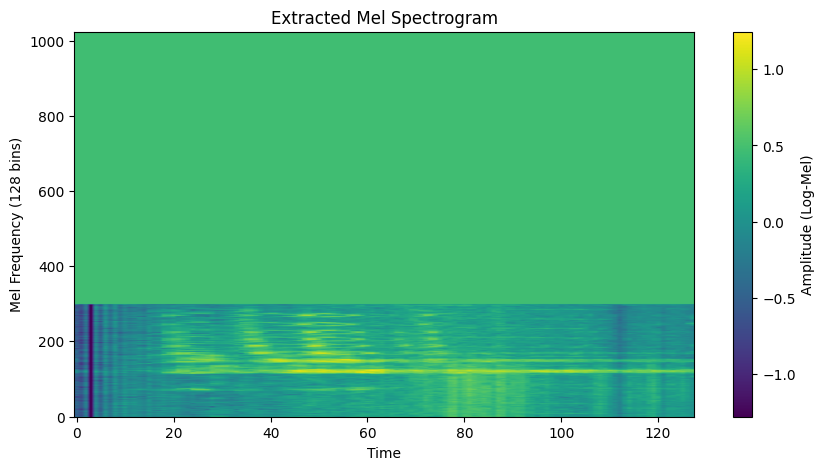

In [99]:
import matplotlib.pyplot as plt

spectrogram = inputs.input_values[0].numpy()

# ✅ Mel Spectrogram 시각화
plt.figure(figsize=(10, 5))
plt.imshow(spectrogram, aspect="auto", origin="lower")
plt.title("Extracted Mel Spectrogram")
plt.xlabel("Time")
plt.ylabel("Mel Frequency (128 bins)")
plt.colorbar(label="Amplitude (Log-Mel)")
plt.show()

In [1]:
from transformers import ASTModel

# Pretrained AST 모델 로드
model = ASTModel.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

# 모델 구조 확인
print(model)


c:\Users\swu\Desktop\TeamPossible\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ASTModel(
  (embeddings): ASTEmbeddings(
    (patch_embeddings): ASTPatchEmbeddings(
      (projection): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ASTEncoder(
    (layer): ModuleList(
      (0): ASTLayer(
        (attention): ASTAttention(
          (attention): ASTSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ASTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ASTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation()
      